# Import

In [1]:
using JLD
using PyPlot

# 3

Squared train Error with least squares: 28122

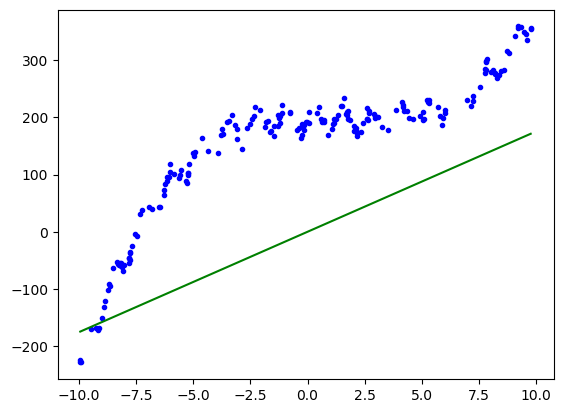

.824
Squared test Error with least squares: 28298.972


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f510c6f5d68>

In [2]:
include("example_nonLinear.jl")

# 3.1 Least Square Bias

In [3]:
function leastSquaresBias(X,y)
    (n,d) = size(X)
    Xnew = [X ones(n,1)]
	# Find regression weights minimizing squared error
	w = (Xnew'Xnew)\(Xnew'y)

	# Make linear prediction function
	function predict(Xhat)
        (n,d) = size(Xhat)
        Xnew = [Xhat ones(n,1)]
        return Xnew*w
    end
	# Return model
	return GenericModel(predict)
end


leastSquaresBias (generic function with 1 method)

In [4]:
data = load("basisData.jld")
(X,y,Xtest,ytest) = (data["X"],data["y"],data["Xtest"],data["ytest"])

# Fit a least squares model
model = leastSquaresBias(X,y)

# Evaluate training error
yhat = model.predict(X)
trainError = mean((yhat - y).^2)
@printf("Squared train Error with least squares: %.3f\n",trainError)

# Evaluate test error
yhat = model.predict(Xtest)
testError = mean((yhat - ytest).^2)
@printf("Squared test Error with least squares: %.3f\n",testError)



Squared train Error with least squares: 3551.346
Squared test Error with least squares: 3393.869


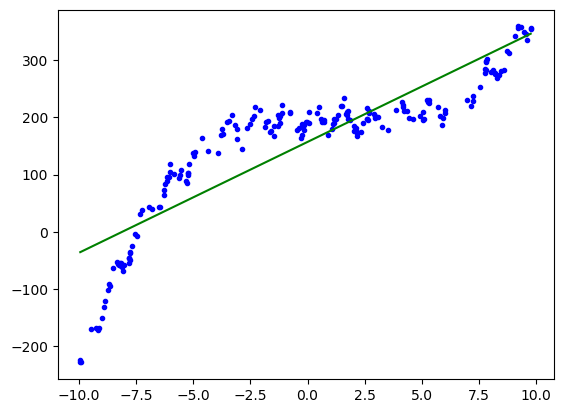

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5105f90da0>

In [5]:
# Plot model
figure()
plot(X,y,"b.")
Xhat = Array(minimum(X):.1:maximum(X))
Xhat = reshape(Xhat, (length(Xhat), 1))
yhat = model.predict(Xhat)
plot(Xhat,yhat,"g")

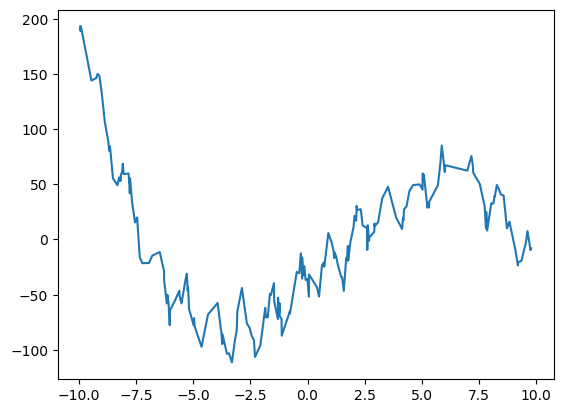

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5105f01a90>

In [6]:
yhat = model.predict(X)
plot(X, yhat -y)

# 3.2 Least Square polynomials

In [7]:
function leastSquaresBasis(X,y, p)
    (n,d) = size(X)
    @assert(d==1)
    Xnew = ones(n,1)
    for i in 1:p
        Xnew = [Xnew X.^i]
    end
	# Find regression weights minimizing squared error
	w = (Xnew'Xnew)\(Xnew'y)

	# Make linear prediction function
	function predict(Xhat)
        (n,d) = size(Xhat)
        @assert(d==1)
        Xnew = ones(n,1)
        for i in 1:p
            Xnew = [Xnew Xhat.^i]
        end
        return Xnew*w
    end
	# Return model
	return GenericModel(predict)
end


leastSquaresBasis (generic function with 1 method)

In [8]:
data = load("basisData.jld")
(X,y,Xtest,ytest) = (data["X"],data["y"],data["Xtest"],data["ytest"])

for p in 0:10
    # Fit a least squares model
    model = leastSquaresBasis(X,y,p)
    @printf("Least Squares Basis with p = %d\n", p)

    # Evaluate training error
    yhat = model.predict(X)
    trainError = mean((yhat - y).^2)
    @printf("Squared train Error with least squares: %.3f\n",trainError)

    # Evaluate test error
    yhat = model.predict(Xtest)
    testError = mean((yhat - ytest).^2)
    @printf("Squared test Error with least squares: %.3f\n",testError)
end


Least Squares Basis with p = 0
Squared train Error with least squares: 15480.520
Squared test Error with least squares: 14390.763
Least Squares Basis with p = 1
Squared train Error with least squares: 3551.346
Squared test Error with least squares: 3393.869
Least Squares Basis with p = 2
Squared train Error with least squares: 2167.992
Squared test Error with least squares: 2480.725
Least Squares Basis with p = 3
Squared train Error with least squares: 252.046
Squared test Error with least squares: 242.805
Least Squares Basis with p = 4
Squared train Error with least squares: 251.462
Squared test Error with least squares: 242.126
Least Squares Basis with p = 5
Squared train Error with least squares: 251.143
Squared test Error with least squares: 239.545
Least Squares Basis with p = 6
Squared train Error with least squares: 248.583
Squared test Error with least squares: 246.005
Least Squares Basis with p = 7
Squared train Error with least squares: 247.011
Squared test Error with least s

# 3.3 nonlinear

In [9]:
function leastSquaresSearch(X,y)
    Xnew = changeBasis(X)
    
	# Find regression weights minimizing squared error
	w = (Xnew'Xnew)\(Xnew'y)

	# Make linear prediction function
	function predict(Xhat)
        Xnew = changeBasis(Xhat)
        return Xnew*w
    end
	# Return model
	return (GenericModel(predict),w)
end


leastSquaresSearch (generic function with 1 method)

In [10]:
function changeBasis(X)
    (n,d) = size(X)
    @assert(d==1)
    #return [ones(n,1) X X.^2 X.^3 X.^4 X.^5 sin.(X.*5) sin.(X./2) sin.(X./3) sin.(X./4)]
    return [ones(n,1) X X.^2 X.^3 sin.(X.*5)]
    

end

changeBasis (generic function with 1 method)

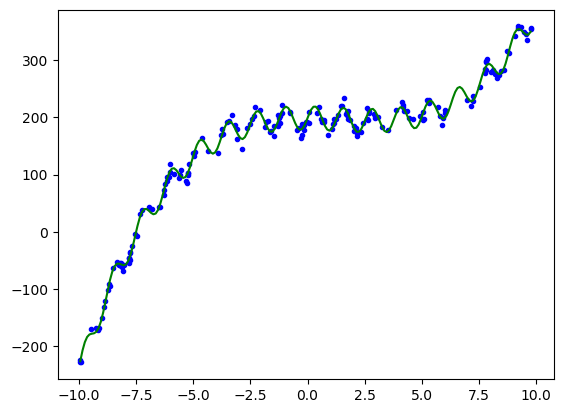

Squared train Error with least squares: 47.414
Squared test Error with least squares: 50.232


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5105ef3320>

In [11]:
data = load("basisData.jld")
(X,y,Xtest,ytest) = (data["X"],data["y"],data["Xtest"],data["ytest"])

# Fit a least squares model
(model, w) = leastSquaresSearch(X,y)

# Evaluate training error
yhat = model.predict(X)
trainError = mean((yhat - y).^2)
@printf("Squared train Error with least squares: %.3f\n",trainError)

# Evaluate test error
yhat = model.predict(Xtest)
testError = mean((yhat - ytest).^2)
@printf("Squared test Error with least squares: %.3f\n",testError)

# Plot model
figure()
plot(X,y,"b.")
Xhat = Array(minimum(X):.1:maximum(X))
Xhat = reshape(Xhat, (length(Xhat), 1))
yhat = model.predict(Xhat)
plot(Xhat,yhat,"g")